In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fitness_func(X):
    # 目标函数，即适应度值，X是种群的表现型
    a = 10
    pi = np.pi
    x = X[:, 0]
    y = X[:, 1]
    return 2 * a + x ** 2 - a * np.cos(2 * pi * x) + y ** 2 - a * np.cos(2 * 3.14 * y)




In [4]:
def decode(x, a, b):
    """解码，即基因型到表现型"""
    xt = 0
    for i in range(len(x)):
        xt = xt + x[i] * np.power(2, i)
    return a + xt * (b - a) / (np.power(2, len(x)) - 1)

def decode_X(X: np.array):
    """对整个种群的基因解码，上面的decode是对某个染色体的某个变量进行解码"""
    X2 = np.zeros((X.shape[0], 2))
    for i in range(X.shape[0]):
        xi = decode(X[i, :20], -5, 5)
        yi = decode(X[i, 20:], -5, 5)
        X2[i, :] = np.array([xi, yi])
    return X2

def select(X, fitness):
    """根据轮盘赌法选择优秀个体"""
    fitness = 1 / fitness  # fitness越小表示越优秀，被选中的概率越大，做 1/fitness 处理
    fitness = fitness / fitness.sum()  # 归一化
    idx = np.array(list(range(X.shape[0])))
    X2_idx = np.random.choice(idx, size=X.shape[0], p=fitness)  # 根据概率选择
    X2 = X[X2_idx, :]
    return X2

def crossover(X, c):
    """按顺序选择2个个体以概率c进行交叉操作"""
    for i in range(0, X.shape[0], 2):
        xa = X[i, :]
        xb = X[i + 1, :]
        for j in range(X.shape[1]):
            # 产生0-1区间的均匀分布随机数，判断是否需要进行交叉替换
            if np.random.rand() <= c:
                xa[j], xb[j] = xb[j], xa[j]
        X[i, :] = xa
        X[i + 1, :] = xb
    return X

def mutation(X, m):
    """变异操作"""
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if np.random.rand() <= m:
                X[i, j] = (X[i, j] + 1) % 2
    return X



最优值是：0.00000
最优解是：x=0.00000, y=0.00000


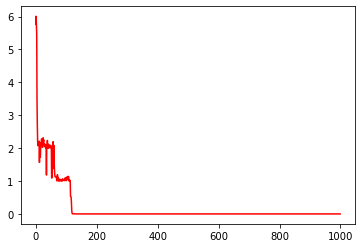

In [6]:


def ga():
    """遗传算法主函数"""
    c = 0.3  # 交叉概率
    m = 0.05  # 变异概率
    best_fitness = []  # 记录每次迭代的效果
    best_xy = []
    iter_num = 1000  # 最大迭代次数
    X0 = np.random.randint(0, 2, (50, 40))  # 随机初始化种群，为50*40的0-1矩阵
    for i in range(iter_num):
        X1 = decode_X(X0)  # 染色体解码
        fitness = fitness_func(X1)  # 计算个体适应度
        X2 = select(X0, fitness)  # 选择操作
        X3 = crossover(X2, c)  # 交叉操作
        X4 = mutation(X3, m)  # 变异操作
        # 计算一轮迭代的效果
        X5 = decode_X(X4)
        fitness = fitness_func(X5)
        best_fitness.append(fitness.min())
        x, y = X5[fitness.argmin()]
        best_xy.append((x, y))
        X0 = X4
    # 多次迭代后的最终效果
    print("最优值是：%.5f" % best_fitness[-1])

    print("最优解是：x=%.5f, y=%.5f" % best_xy[-1])
    # 最优值是：0.00000
    # 最优解是：x=0.00000, y=-0.00000
    # 打印效果
    plt.plot(best_fitness, color='r')
    plt.show()

ga()
